Imports: load numpy, pandas and plotting libraries used throughout the notebook.

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


Load data: read the CSV file into a pandas DataFrame named df.

In [39]:
df=pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")

Preview: display the first few rows to inspect columns and sample values.

In [40]:
print(df.head())


         Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89   
2  2020-01-06      Fish Oil        Omega         161  12.91  2078.51   
3  2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80   
4  2020-01-06   Pre-Workout  Performance         157  35.47  5568.79   

   Discount  Units Returned Location Platform  
0      0.03               2   Canada  Walmart  
1      0.04               0       UK   Amazon  
2      0.25               0   Canada   Amazon  
3      0.08               0   Canada  Walmart  
4      0.25               3   Canada    iHerb  


Info: show dataframe schema, types, and non-null counts.

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB
None


Missing values: compute per-column missing value counts to identify gaps.

In [42]:
df.isna().sum()


Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

Duplicate check: count duplicated rows to assess data quality.

In [43]:
print(df.duplicated().sum())

0


Date handling: convert the Date column to datetime and re-check info.

In [44]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB
None


Categorical exploration: inspect unique values for key categorical columns.

In [45]:
cat_cols = ['Product Name', 'Category', 'Location', 'Platform']
for col in cat_cols:
    print(col, df[col].unique()[:10])


Product Name ['Whey Protein' 'Vitamin C' 'Fish Oil' 'Multivitamin' 'Pre-Workout' 'BCAA'
 'Creatine' 'Zinc' 'Collagen Peptides' 'Magnesium']
Category ['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid' 'Mineral' 'Herbal'
 'Sleep Aid' 'Fat Burner' 'Hydration']
Location ['Canada' 'UK' 'USA']
Platform ['Walmart' 'Amazon' 'iHerb']


Aggregations: compute total and weekly revenue, return rate, and revenue by discount/location.

In [46]:
total_revenue = df['Revenue'].sum()
weekly_revenue = df.groupby('Date')['Revenue'].sum()
df['Return_Rate'] = df['Units Returned'] / df['Units Sold']
discount_impact = df.groupby('Discount')['Revenue'].sum()
location_perf = df.groupby('Location')['Revenue'].sum()

Cost and margins: estimate cost, compute per-unit margin and total margin; display margin distribution.

Total Margin: 9165312.18


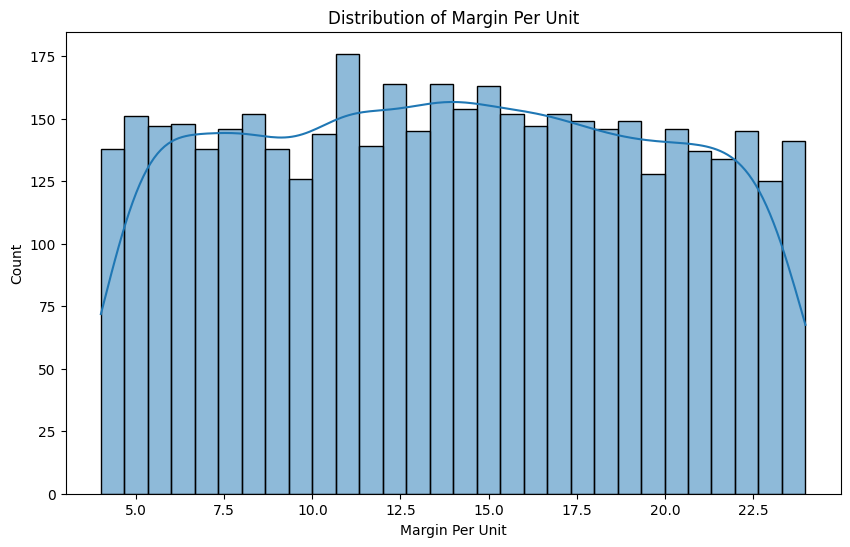

In [47]:
df['Cost'] = df['Price'] * 0.6
df['Margin_Per_Unit'] = df['Price'] - df['Cost']
df['Total_Margin'] = df['Margin_Per_Unit'] * df['Units Sold']

total_margin = df['Total_Margin'].sum()
print("Total Margin:", total_margin)
plt.figure(figsize=(10,6))
sns.histplot(df['Margin_Per_Unit'], bins=30, kde=True)
plt.title('Distribution of Margin Per Unit')
plt.xlabel('Margin Per Unit')
plt.show()


Top products: compute top 10 products by revenue and visualize their revenue trend.

Product Name
Biotin               1486798.62
Zinc                 1482546.95
Pre-Workout          1477183.78
BCAA                 1464819.63
Fish Oil             1451065.87
Green Tea Extract    1440900.05
Collagen Peptides    1433297.24
Creatine             1432518.40
Iron Supplement      1431582.41
Whey Protein         1422194.85
Name: Revenue, dtype: float64


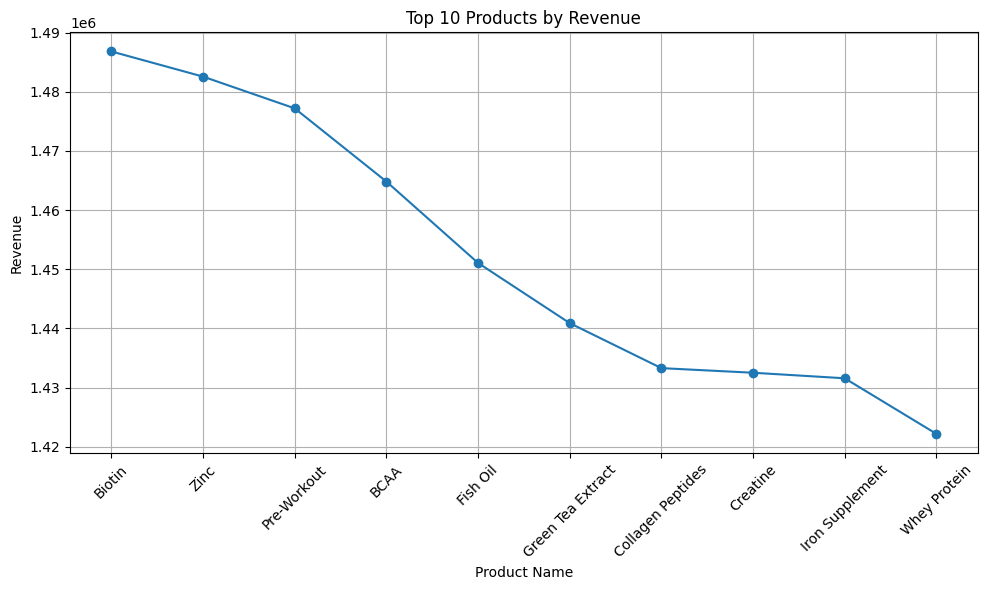

In [58]:
top_products = (
    df.groupby('Product Name')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_products)

import matplotlib.pyplot as plt

top_products = (
    df.groupby('Product Name')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.plot(top_products.index, top_products.values, marker='o', linestyle='-')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Weekly growth: compute weekly revenue and percent change; visualize growth over time.

Date
2020-01-06         NaN
2020-01-13    0.007900
2020-01-20    0.051594
2020-01-27   -0.076763
2020-02-03    0.394058
                ...   
2025-03-03   -0.266457
2025-03-10    0.400272
2025-03-17   -0.290987
2025-03-24    0.063849
2025-03-31    0.173930
Name: Revenue, Length: 274, dtype: float64


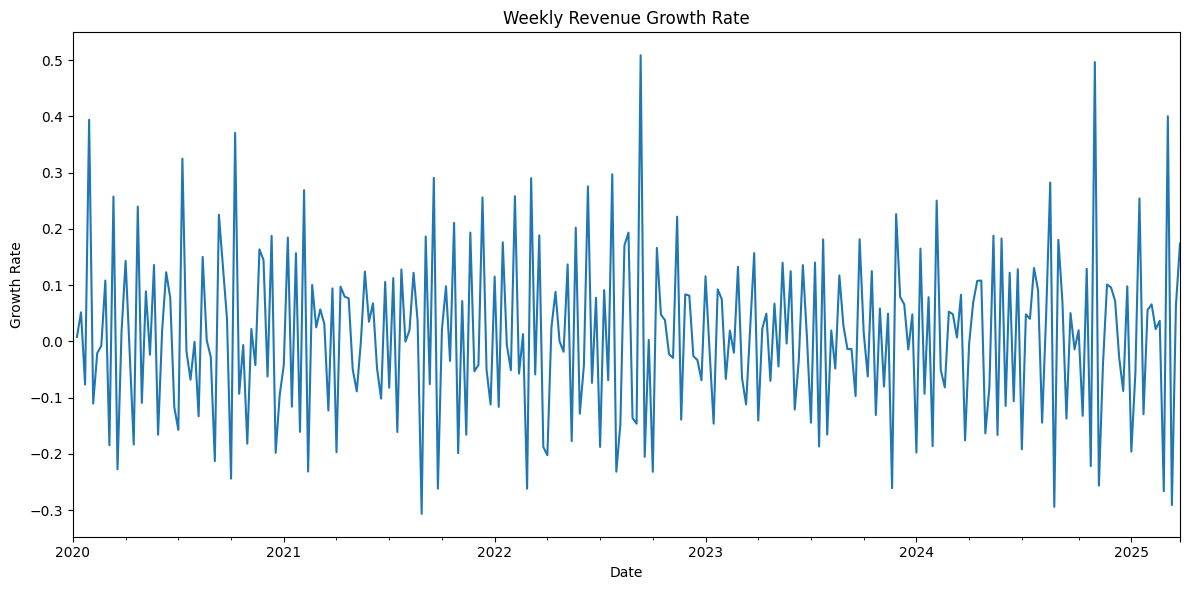

In [49]:
weekly_revenue = df.groupby('Date')['Revenue'].sum().sort_index()
weekly_growth = weekly_revenue.pct_change()

print(weekly_growth)

# Visualize weekly revenue growth
plt.figure(figsize=(12,6))
weekly_growth.plot(kind='line')
plt.title('Weekly Revenue Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.tight_layout()
plt.show()

## KPI Summary
Below are core KPIs and quick visualizations: total revenue, total units sold, revenue per unit, average price, overall return rate, and total margin. Visuals show revenue by category/platform, cumulative revenue, and a 4-week rolling average.

Total Revenue: $22,913,280.45
Total Units Sold: 658,478
Revenue per Unit: $34.80
Average Price: $34.78
Overall Return Rate: 1.02%
Total Margin: $9,165,312.18


C:\Users\sfaxi\AppData\Local\Temp\ipykernel_14640\1641811035.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rev.values, y=category_rev.index, palette='viridis')
C:\Users\sfaxi\AppData\Local\Temp\ipykernel_14640\1641811035.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_rev.values, y=platform_rev.index, palette='magma')


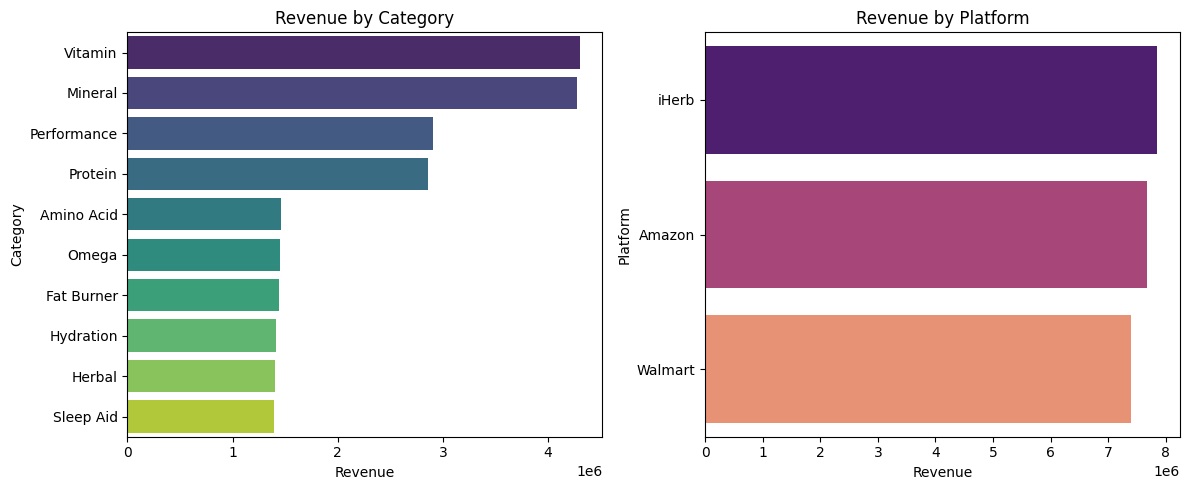

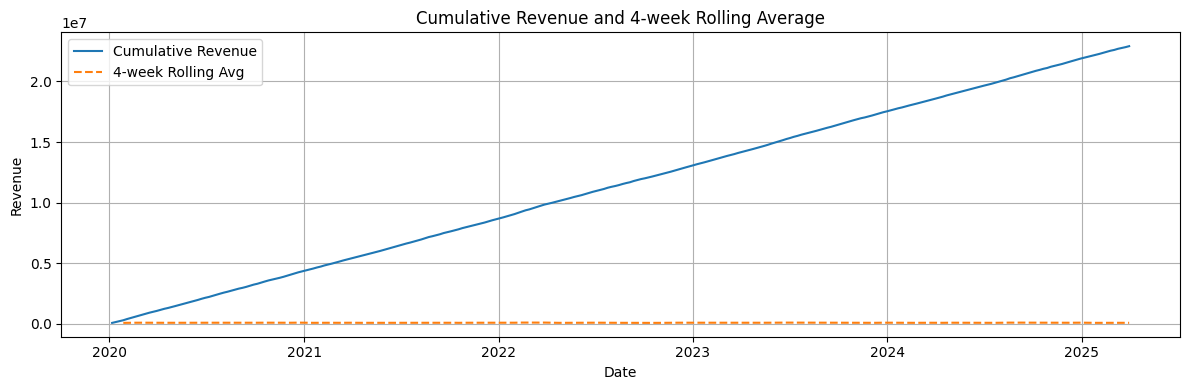

In [59]:
# Compute concise KPIs
total_revenue = df['Revenue'].sum()
total_units = df['Units Sold'].sum()
revenue_per_unit = (total_revenue / total_units) if total_units>0 else np.nan
avg_price = df['Price'].mean()
overall_return_rate = (df['Units Returned'].sum() / total_units) if total_units>0 else np.nan
total_margin = df['Total_Margin'].sum() if 'Total_Margin' in df.columns else (df['Price'] * 0.4 * df['Units Sold']).sum()

# Print KPIs
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Units Sold: {int(total_units):,}")
print(f"Revenue per Unit: ${revenue_per_unit:,.2f}")
print(f"Average Price: ${avg_price:,.2f}")
print(f"Overall Return Rate: {overall_return_rate:.2%}")
print(f"Total Margin: ${total_margin:,.2f}")

# Prepare category/platform revenue for plotting
category_rev = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
platform_rev = df.groupby('Platform')['Revenue'].sum().sort_values(ascending=False)
weekly_revenue = df.groupby('Date')['Revenue'].sum().sort_index()

# Plot revenue by Category and Platform
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=category_rev.values, y=category_rev.index, palette='viridis')
plt.title('Revenue by Category')
plt.xlabel('Revenue')
plt.subplot(1,2,2)
sns.barplot(x=platform_rev.values, y=platform_rev.index, palette='magma')
plt.title('Revenue by Platform')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

# Cumulative revenue and 4-week rolling average
plt.figure(figsize=(12,4))
plt.plot(weekly_revenue.index, weekly_revenue.cumsum(), label='Cumulative Revenue')
plt.plot(weekly_revenue.index, weekly_revenue.rolling(4).mean(), label='4-week Rolling Avg', linestyle='--')
plt.title('Cumulative Revenue and 4-week Rolling Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### US3 - Sales by Product, Region, and Period
This section analyzes and visualizes sales by product, region (location), and time period (week/month).

C:\Users\sfaxi\AppData\Local\Temp\ipykernel_14640\334399896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index[:10], y=product_sales.values[:10], palette='Blues_r')


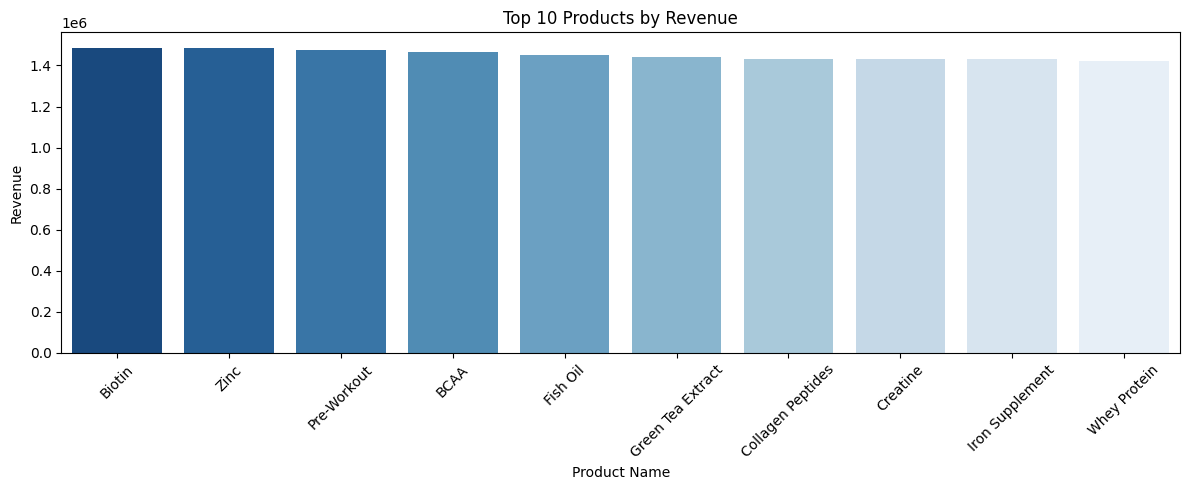

C:\Users\sfaxi\AppData\Local\Temp\ipykernel_14640\334399896.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='Greens_r')


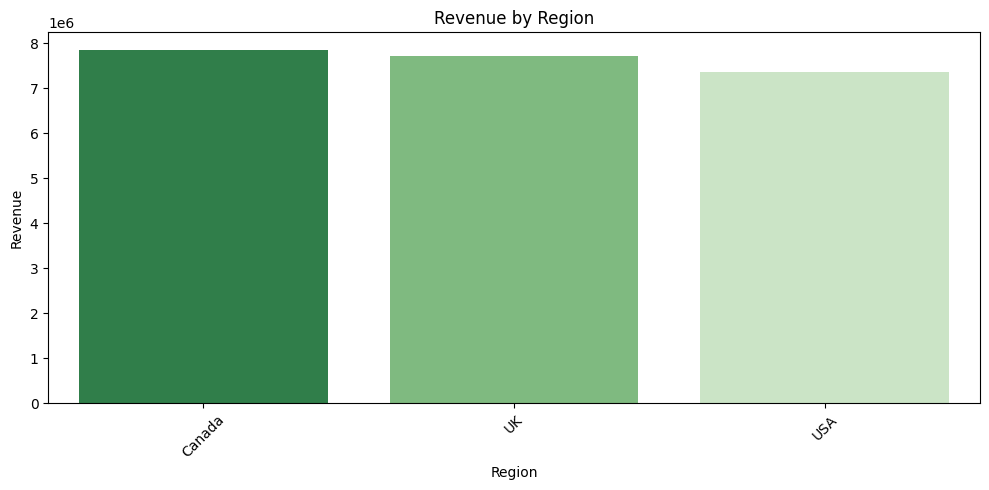

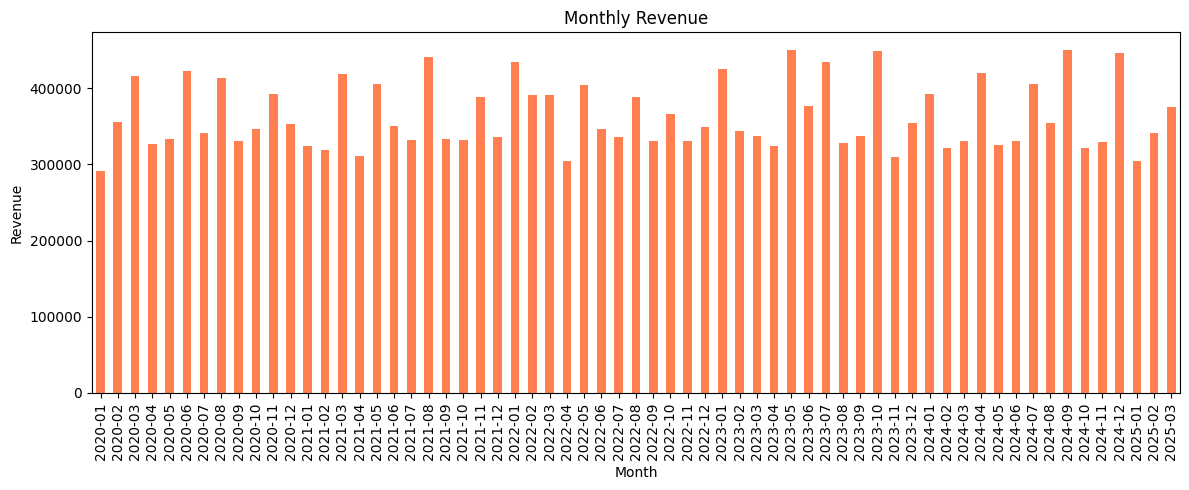

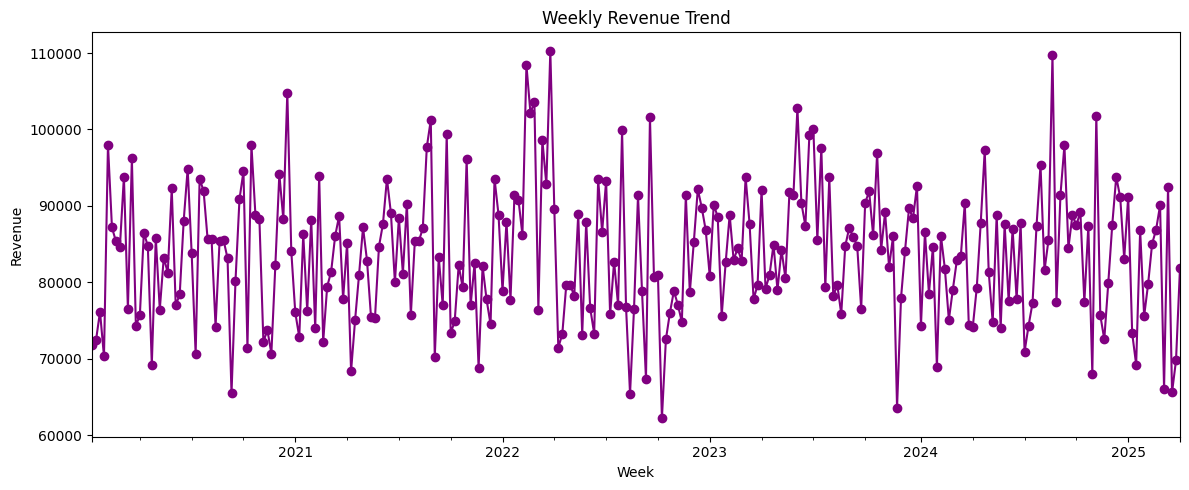

In [60]:
# Sales by Product
product_sales = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=product_sales.index[:10], y=product_sales.values[:10], palette='Blues_r')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by Region (Location)
region_sales = df.groupby('Location')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Greens_r')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by Period (Month)
df['Month'] = df['Date'].dt.to_period('M')
month_sales = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(12,5))
month_sales.plot(kind='bar', color='coral')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Sales by Period (Week)
df['Week'] = df['Date'].dt.to_period('W')
week_sales = df.groupby('Week')['Revenue'].sum()
plt.figure(figsize=(12,5))
week_sales.plot(kind='line', marker='o', color='purple')
plt.title('Weekly Revenue Trend')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()